In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Data Path
npz_path = "../HAC/data/H2NO+NH2-T.npz"

# Load Data
data = np.load(npz_path, allow_pickle=True)
print("Keys contained:", list(data.keys()))
print(f"\nTotal number of keys: {len(data.keys())}")

Keys contained: ['R', 'Z', 'N', 'E', 'F', 'V', 'RXN']

Total number of keys: 7


In [ ]:
print("=" * 80)
print("DATA STRUCTURE OVERVIEW")
print("=" * 80)

for key in data.keys():
    arr = data[key]
    try:
        shape = arr.shape
    except Exception:
        shape = "unknown"
    
    print(f"\nKey: {key}")
    print(f"  Shape: {shape}")
    print(f"  Dtype: {getattr(arr, 'dtype', type(arr))}")
    
    # Display first 3 samples
    try:
        sample = arr[:3]
    except Exception:
        sample = arr
    
    print("  First 3 samples:")
    print(sample)
    print("-" * 40)

DATA STRUCTURE OVERVIEW

Key: R
  Shape: (10246, 7, 3)
  Dtype: float64
  First 3 samples:
[[[-0.65519535  0.46582249 -0.00584592]
  [ 0.43678313  0.25853766  0.11383544]
  [-0.96148069  1.4042881   0.25957402]
  [-1.50719919 -0.45070775 -0.10768004]
  [ 1.87989281 -0.0210815   0.0827979 ]
  [ 2.15101502  0.13067679 -0.89444752]
  [ 1.89653428 -1.04148478  0.18814712]]

 [[-0.65379816  0.46566578 -0.00555253]
  [ 0.43300004  0.28066842  0.13576804]
  [-0.95110594  1.40410842  0.25966363]
  [-1.50478434 -0.45410274 -0.10638179]
  [ 1.87579532 -0.01879254  0.08017642]
  [ 2.14012742  0.1399796  -0.89968119]
  [ 1.90002452 -1.04848273  0.18310351]]

 [[-0.65230579  0.46550166 -0.00523846]
  [ 0.42898361  0.30393679  0.15905138]
  [-0.94031101  1.40405558  0.25977703]
  [-1.5022015  -0.45771662 -0.10499514]
  [ 1.87143945 -0.01638627  0.07738204]
  [ 2.12847707  0.14985412 -0.90515518]
  [ 1.90369218 -1.05536985  0.17763772]]]
----------------------------------------

Key: Z
  Shape: (1024

In [ ]:
# Extract key statistical information
print("=" * 80)
print("DATASET STATISTICS")
print("=" * 80)

# Number of molecules
n_molecules = len(data['R'])
print(f"\nTotal number of molecules: {n_molecules}")

# Atom type statistics
all_atom_types = []
for z_array in data['Z']:
    all_atom_types.extend(z_array)

atom_counter = Counter(all_atom_types)
print(f"\nAtomic composition:")
atom_symbols = {1: 'H', 6: 'C', 7: 'N', 8: 'O', 9: 'F', 15: 'P', 16: 'S', 17: 'Cl', 35: 'Br', 53: 'I'}
for atom_num, count in sorted(atom_counter.items()):
    symbol = atom_symbols.get(atom_num, f'Z={atom_num}')
    percentage = count / len(all_atom_types) * 100
    print(f"  {symbol} ({atom_num}): {count} atoms ({percentage:.2f}%)")

# Atoms per molecule statistics
atoms_per_molecule = [len(z) for z in data['Z']]
print(f"\nAtoms per molecule:")
print(f"  Mean: {np.mean(atoms_per_molecule):.2f}")
print(f"  Median: {np.median(atoms_per_molecule):.2f}")
print(f"  Minimum: {np.min(atoms_per_molecule)}")
print(f"  Maximum: {np.max(atoms_per_molecule)}")
print(f"  Standard deviation: {np.std(atoms_per_molecule):.2f}")

DATASET STATISTICS

Total number of molecules: 10246

Atomic composition:
  H (1): 40984 atoms (57.14%)
  N (7): 20492 atoms (28.57%)
  O (8): 10246 atoms (14.29%)

Atoms per molecule:
  Mean: 7.00
  Median: 7.00
  Min: 7
  Max: 7
  Std: 0.00


In [ ]:
print("=" * 80)
print("ENERGY STATISTICS")
print("=" * 80)

energies = data['E']
print(f"\nTotal energies (Hartree):")
print(f"  Mean: {np.mean(energies):.6f}")
print(f"  Median: {np.median(energies):.6f}")
print(f"  Minimum: {np.min(energies):.6f}")
print(f"  Maximum: {np.max(energies):.6f}")
print(f"  Standard deviation: {np.std(energies):.6f}")

# Convert to other units
ev_conversion = 27.211386  # Hartree to eV
kcal_conversion = 627.509  # Hartree to kcal/mol

print(f"\nTotal energies (eV):")
print(f"  Mean: {np.mean(energies) * ev_conversion:.2f}")
print(f"  Range: [{np.min(energies) * ev_conversion:.2f}, {np.max(energies) * ev_conversion:.2f}]")

print(f"\nTotal energies (kcal/mol):")
print(f"  Mean: {np.mean(energies) * kcal_conversion:.2f}")
print(f"  Range: [{np.min(energies) * kcal_conversion:.2f}, {np.max(energies) * kcal_conversion:.2f}]")

ENERGY STATISTICS

Total energies (Hartree):
  Mean: 145.023923
  Median: 141.248172
  Min: 0.000000
  Max: 416.066214
  Std: 50.950252

Total energies (eV):
  Mean: 3946.30
  Range: [0.00, 11321.74]

Total energies (kcal/mol):
  Mean: 91003.82
  Range: [0.00, 261085.29]


In [ ]:
print("=" * 80)
print("FORCE STATISTICS")
print("=" * 80)

# Collect all force components
all_forces = []
for F in data['F']:
    all_forces.append(F.flatten())

all_forces = np.concatenate(all_forces)

print(f"\nForces (Hartree/Bohr):")
print(f"  Mean: {np.mean(all_forces):.6f}")
print(f"  Median: {np.median(all_forces):.6f}")
print(f"  Minimum: {np.min(all_forces):.6f}")
print(f"  Maximum: {np.max(all_forces):.6f}")
print(f"  Standard deviation: {np.std(all_forces):.6f}")

# Calculate force magnitudes
force_magnitudes = []
for F in data['F']:
    magnitudes = np.linalg.norm(F, axis=1)
    force_magnitudes.extend(magnitudes)

force_magnitudes = np.array(force_magnitudes)
print(f"\nForce magnitudes (Hartree/Bohr):")
print(f"  Mean: {np.mean(force_magnitudes):.6f}")
print(f"  Median: {np.median(force_magnitudes):.6f}")
print(f"  Max: {np.max(force_magnitudes):.6f}")

FORCE STATISTICS

Forces (Hartree/Bohr):
  Mean: -0.000000
  Median: 0.000068
  Min: -0.623049
  Max: 0.635874
  Std: 0.051855

Force magnitudes (Hartree/Bohr):
  Mean: 0.071957
  Median: 0.061209
  Max: 0.898538


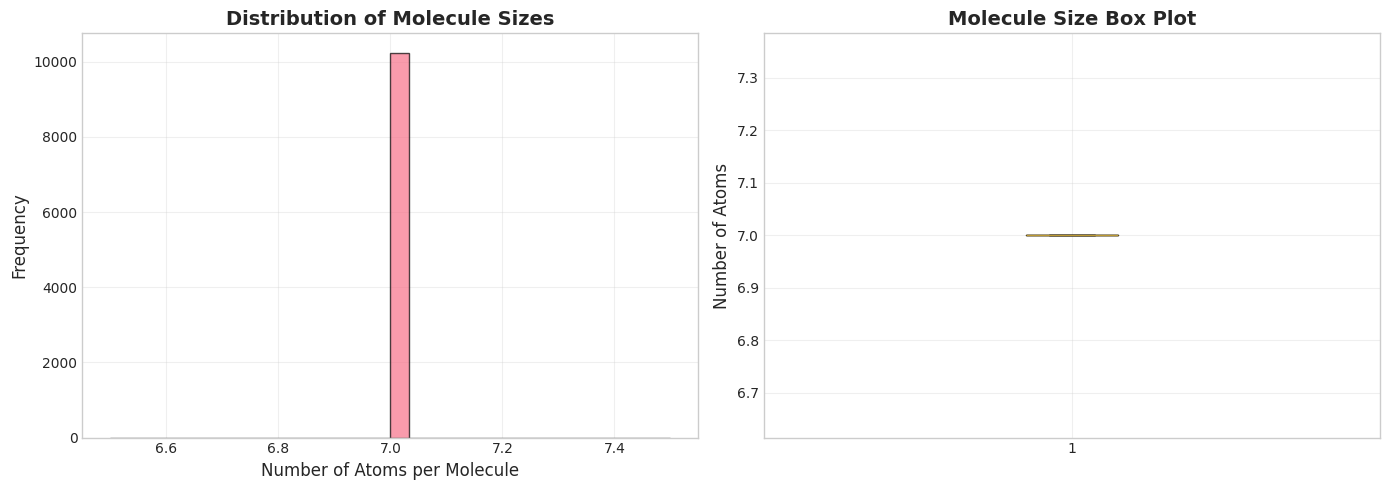

Molecules with < 10 atoms: 10246
Molecules with 10-20 atoms: 0
Molecules with > 20 atoms: 0


In [ ]:
# Plot the distribution of atoms per molecule
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(atoms_per_molecule, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Atoms per Molecule', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Molecule Sizes', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(atoms_per_molecule, vert=True)
axes[1].set_ylabel('Number of Atoms', fontsize=12)
axes[1].set_title('Molecule Size Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Molecules with < 10 atoms: {sum(1 for x in atoms_per_molecule if x < 10)}")
print(f"Molecules with 10-20 atoms: {sum(1 for x in atoms_per_molecule if 10 <= x < 20)}")
print(f"Molecules with > 20 atoms: {sum(1 for x in atoms_per_molecule if x >= 20)}")

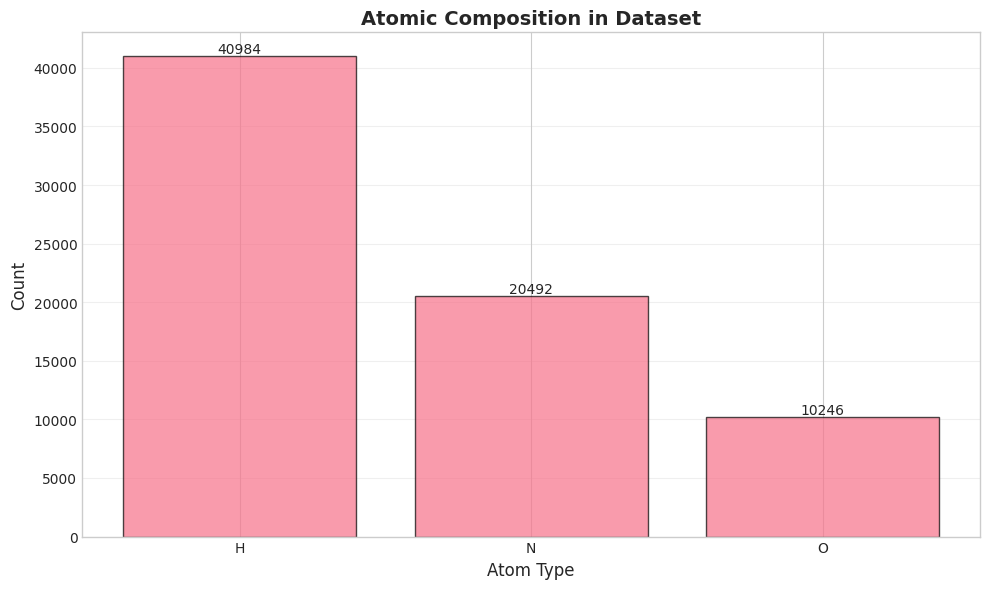

In [ ]:
# Plot atomic type distribution
fig, ax = plt.subplots(figsize=(10, 6))

atom_types = sorted(atom_counter.keys())
atom_counts = [atom_counter[at] for at in atom_types]
atom_labels = [atom_symbols.get(at, f'Z={at}') for at in atom_types]

bars = ax.bar(atom_labels, atom_counts, edgecolor='black', alpha=0.7)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Atom Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Atomic Composition in Dataset', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

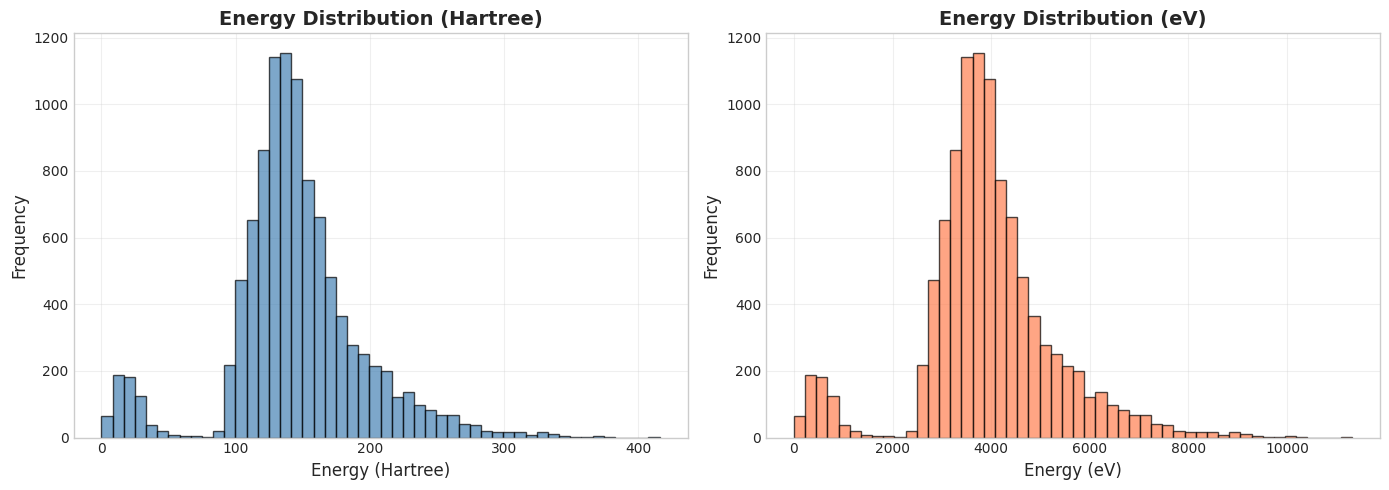

In [ ]:
# Plot energy distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hartree units
axes[0].hist(energies, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Energy (Hartree)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Energy Distribution (Hartree)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# eV units
axes[1].hist(energies * ev_conversion, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Energy (eV)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Energy Distribution (eV)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

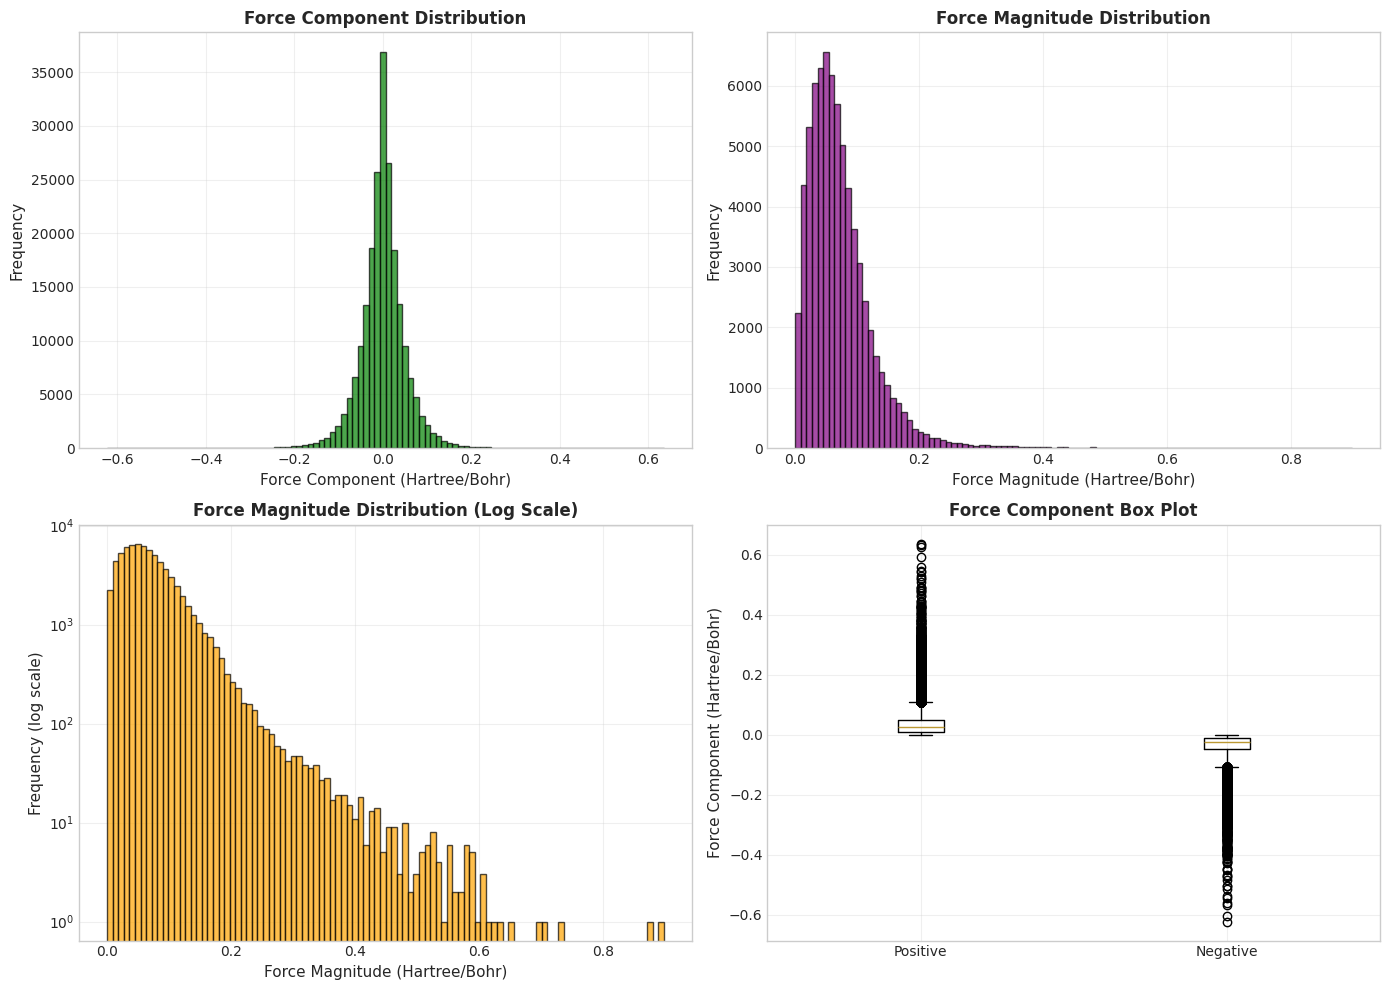

In [ ]:
# Plot force distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Force component distribution
axes[0, 0].hist(all_forces, bins=100, edgecolor='black', alpha=0.7, color='green')
axes[0, 0].set_xlabel('Force Component (Hartree/Bohr)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Force Component Distribution', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Force magnitude distribution
axes[0, 1].hist(force_magnitudes, bins=100, edgecolor='black', alpha=0.7, color='purple')
axes[0, 1].set_xlabel('Force Magnitude (Hartree/Bohr)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Force Magnitude Distribution', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Force magnitude distribution with log scale
axes[1, 0].hist(force_magnitudes, bins=100, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Force Magnitude (Hartree/Bohr)', fontsize=11)
axes[1, 0].set_ylabel('Frequency (log scale)', fontsize=11)
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Force Magnitude Distribution (Log Scale)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Box plot of force components
axes[1, 1].boxplot([all_forces[all_forces > 0], 
                     all_forces[all_forces < 0]], 
                    labels=['Positive', 'Negative'])
axes[1, 1].set_ylabel('Force Component (Hartree/Bohr)', fontsize=11)
axes[1, 1].set_title('Force Component Box Plot', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

COORDINATE STATISTICS

Coordinates (Bohr):
  Mean: 0.059716
  Median: 0.064358
  Min: -9.670573
  Max: 6.913661
  Std: 1.891614


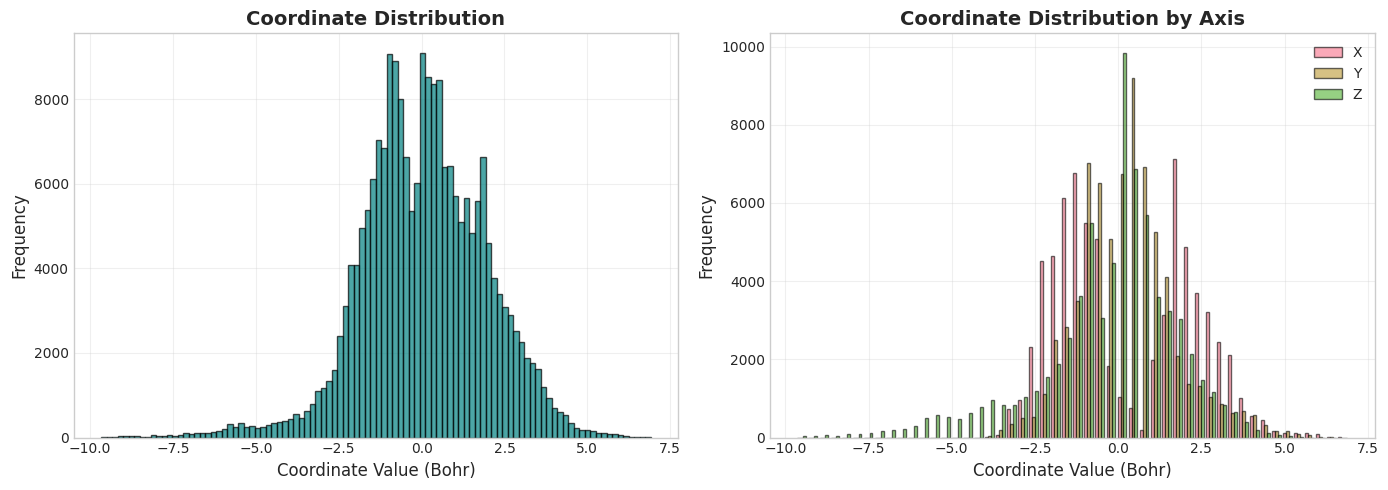

In [ ]:
# Analyze coordinate distribution
all_coords = []
for R in data['R']:
    all_coords.append(R.flatten())

all_coords = np.concatenate(all_coords)

print("=" * 80)
print("COORDINATE STATISTICS")
print("=" * 80)
print(f"\nCoordinates (Bohr):")
print(f"  Mean: {np.mean(all_coords):.6f}")
print(f"  Median: {np.median(all_coords):.6f}")
print(f"  Minimum: {np.min(all_coords):.6f}")
print(f"  Maximum: {np.max(all_coords):.6f}")
print(f"  Standard deviation: {np.std(all_coords):.6f}")

# Plot coordinate distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(all_coords, bins=100, edgecolor='black', alpha=0.7, color='teal')
axes[0].set_xlabel('Coordinate Value (Bohr)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Coordinate Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Distribution of 3D coordinate axes
x_coords = [R[:, 0] for R in data['R']]
y_coords = [R[:, 1] for R in data['R']]
z_coords = [R[:, 2] for R in data['R']]

x_flat = np.concatenate(x_coords)
y_flat = np.concatenate(y_coords)
z_flat = np.concatenate(z_coords)

axes[1].hist([x_flat, y_flat, z_flat], bins=50, label=['X', 'Y', 'Z'], 
             alpha=0.6, edgecolor='black')
axes[1].set_xlabel('Coordinate Value (Bohr)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Coordinate Distribution by Axis', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

BOND LENGTH ANALYSIS

All pairwise distances (Bohr):
  Mean: 3.1232
  Min: 0.9069
  Max: 8.8344

Potential bonds (< 3 Å):
  Count: 18444
  Mean: 2.6520 Bohr (1.4034 Å)
  Min: 0.9069 Bohr (0.4799 Å)
  Max: 5.6699 Bohr (3.0004 Å)


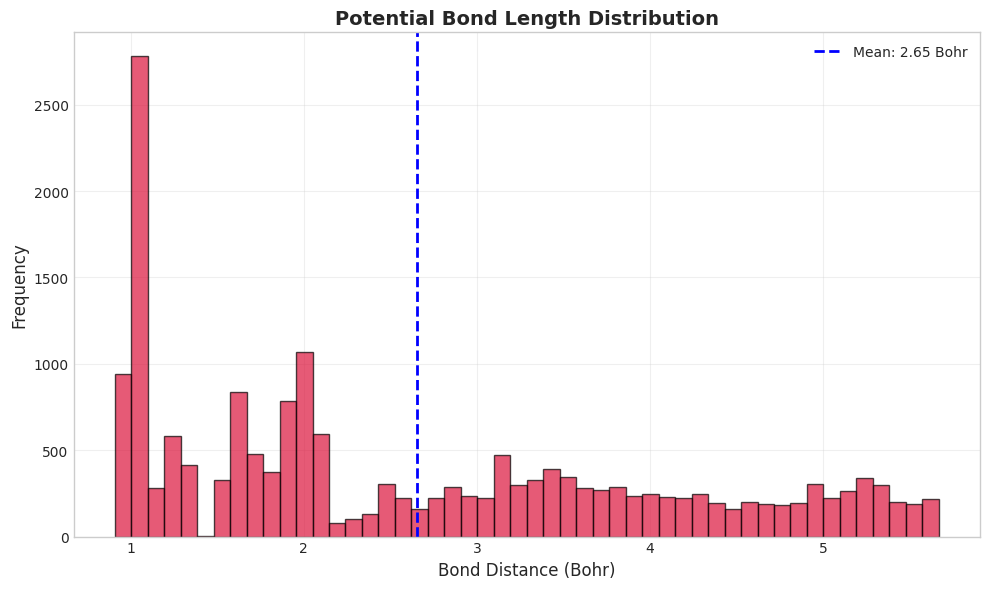

In [14]:
# 计算所有原子对之间的距离统计
print("=" * 80)
print("BOND LENGTH ANALYSIS")
print("=" * 80)

all_distances = []
bond_distances = []  # 只统计可能的化学键（距离 < 3 Å）

for R in data['R'][:1000]:  # 只分析前1000个分子以节省时间
    n_atoms = len(R)
    for i in range(n_atoms):
        for j in range(i+1, n_atoms):
            dist = np.linalg.norm(R[i] - R[j])
            all_distances.append(dist)
            if dist < 5.67:  # 3 Å in Bohr (1 Å = 1.889726 Bohr)
                bond_distances.append(dist)

all_distances = np.array(all_distances)
bond_distances = np.array(bond_distances)

print(f"\nAll pairwise distances (Bohr):")
print(f"  Mean: {np.mean(all_distances):.4f}")
print(f"  Min: {np.min(all_distances):.4f}")
print(f"  Max: {np.max(all_distances):.4f}")

print(f"\nPotential bonds (< 3 Å):")
print(f"  Count: {len(bond_distances)}")
print(f"  Mean: {np.mean(bond_distances):.4f} Bohr ({np.mean(bond_distances)/1.889726:.4f} Å)")
print(f"  Min: {np.min(bond_distances):.4f} Bohr ({np.min(bond_distances)/1.889726:.4f} Å)")
print(f"  Max: {np.max(bond_distances):.4f} Bohr ({np.max(bond_distances)/1.889726:.4f} Å)")

# 绘制键长分布
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(bond_distances, bins=50, edgecolor='black', alpha=0.7, color='crimson')
ax.set_xlabel('Bond Distance (Bohr)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Potential Bond Length Distribution', fontsize=14, fontweight='bold')
ax.axvline(x=np.mean(bond_distances), color='blue', linestyle='--', 
           linewidth=2, label=f'Mean: {np.mean(bond_distances):.2f} Bohr')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

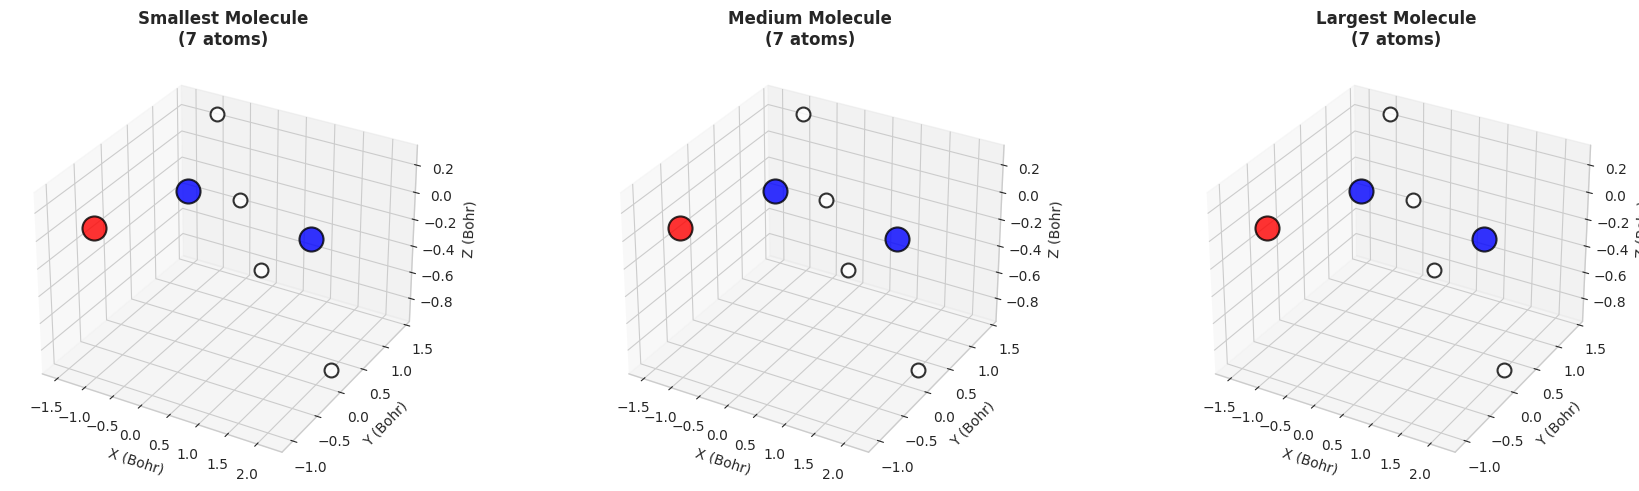


Smallest molecule: 7 atoms
Medium molecule: 7 atoms
Largest molecule: 7 atoms


In [ ]:
# Visualize several example molecules
from mpl_toolkits.mplot3d import Axes3D

# Select molecules of different sizes
small_idx = np.argmin(atoms_per_molecule)
medium_idx = np.argmin(np.abs(np.array(atoms_per_molecule) - np.median(atoms_per_molecule)))
large_idx = np.argmax(atoms_per_molecule)

indices = [small_idx, medium_idx, large_idx]
titles = ['Smallest Molecule', 'Medium Molecule', 'Largest Molecule']

fig = plt.figure(figsize=(18, 5))

for plot_idx, (idx, title) in enumerate(zip(indices, titles)):
    ax = fig.add_subplot(1, 3, plot_idx + 1, projection='3d')
    
    R = data['R'][idx]
    z = data['Z'][idx]
    
    # Atom color mapping
    colors = {1: 'white', 6: 'gray', 7: 'blue', 8: 'red', 
              9: 'green', 15: 'orange', 16: 'yellow', 
              17: 'lime', 35: 'brown', 53: 'purple'}
    
    # Atom size mapping
    sizes = {1: 100, 6: 300, 7: 300, 8: 300, 
             9: 250, 15: 350, 16: 350, 
             17: 300, 35: 400, 53: 450}
    
    for atom_z, (x, y, z_coord) in zip(z, R):
        color = colors.get(atom_z, 'black')
        size = sizes.get(atom_z, 200)
        ax.scatter(x, y, z_coord, c=color, s=size, 
                  edgecolors='black', linewidths=1.5, alpha=0.8)
    
    ax.set_xlabel('X (Bohr)', fontsize=10)
    ax.set_ylabel('Y (Bohr)', fontsize=10)
    ax.set_zlabel('Z (Bohr)', fontsize=10)
    ax.set_title(f'{title}\n({len(z)} atoms)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nSmallest molecule: {atoms_per_molecule[small_idx]} atoms")
print(f"Medium molecule: {atoms_per_molecule[medium_idx]} atoms")
print(f"Largest molecule: {atoms_per_molecule[large_idx]} atoms")

In [ ]:
print("=" * 80)
print("DATA QUALITY CHECKS")
print("=" * 80)

# Check for missing values and anomalies
print("\n1. Checking for NaN values...")
has_nan = False
for key in data.keys():
    arr = data[key]
    if isinstance(arr, np.ndarray):
        try:
            if np.isnan(arr).any():
                print(f"  WARNING: {key} contains NaN values")
                has_nan = True
        except:
            pass

if not has_nan:
    print("  ✓ No NaN values found")

# Check for infinite values
print("\n2. Checking for infinite values...")
has_inf = False
for key in data.keys():
    arr = data[key]
    if isinstance(arr, np.ndarray):
        try:
            if np.isinf(arr).any():
                print(f"  WARNING: {key} contains infinite values")
                has_inf = True
        except:
            pass

if not has_inf:
    print("  ✓ No infinite values found")

# Check data consistency
print("\n3. Checking data consistency...")
n_mols = len(data['R'])
consistent = True

if len(data['Z']) != n_mols:
    print(f"  WARNING: Inconsistent number of atomic numbers")
    consistent = False
if len(data['E']) != n_mols:
    print(f"  WARNING: Inconsistent number of energies")
    consistent = False
if len(data['F']) != n_mols:
    print(f"  WARNING: Inconsistent number of force arrays")
    consistent = False

# Check if atom count matches force dimensions for each molecule
for i in range(min(n_mols, 100)):  # Check first 100 molecules
    if len(data['Z'][i]) != len(data['R'][i]):
        print(f"  WARNING: Molecule {i}: atom count mismatch")
        consistent = False
    if len(data['Z'][i]) != len(data['F'][i]):
        print(f"  WARNING: Molecule {i}: force array size mismatch")
        consistent = False

if consistent:
    print("  ✓ Data dimensions are consistent")

# Check for outliers
print("\n4. Checking for outliers...")
energy_z_scores = np.abs((energies - np.mean(energies)) / np.std(energies))
energy_outliers = np.sum(energy_z_scores > 3)
print(f"  Energy outliers (|z-score| > 3): {energy_outliers} ({energy_outliers/len(energies)*100:.2f}%)")

force_z_scores = np.abs((force_magnitudes - np.mean(force_magnitudes)) / np.std(force_magnitudes))
force_outliers = np.sum(force_z_scores > 3)
print(f"  Force outliers (|z-score| > 3): {force_outliers} ({force_outliers/len(force_magnitudes)*100:.2f}%)")

print("\n" + "=" * 80)
print("DATA QUALITY CHECK COMPLETE")
print("=" * 80)

DATA QUALITY CHECKS

1. Checking for NaN values...
  ✓ No NaN values found

2. Checking for infinite values...
  ✓ No infinite values found

3. Checking data consistency...
  ✓ Data dimensions are consistent

4. Checking for outliers...
  Energy outliers (|z-score| > 3): 88 (0.86%)
  Force outliers (|z-score| > 3): 1054 (1.47%)

DATA QUALITY CHECK COMPLETE


In [ ]:
# Generate complete data summary
summary = {
    'Total Molecules': n_molecules,
    'Total Atoms': len(all_atom_types),
    'Unique Atom Types': len(atom_counter),
    'Atoms per Molecule (mean)': f"{np.mean(atoms_per_molecule):.2f}",
    'Atoms per Molecule (range)': f"[{np.min(atoms_per_molecule)}, {np.max(atoms_per_molecule)}]",
    'Energy Mean (Hartree)': f"{np.mean(energies):.6f}",
    'Energy Standard Deviation (Hartree)': f"{np.std(energies):.6f}",
    'Force Magnitude Mean (Hartree/Bohr)': f"{np.mean(force_magnitudes):.6f}",
    'Force Magnitude Maximum (Hartree/Bohr)': f"{np.max(force_magnitudes):.6f}",
}

# Create DataFrame
summary_df = pd.DataFrame(list(summary.items()), columns=['Property', 'Value'])

print("=" * 80)
print("DATA SUMMARY REPORT")
print("=" * 80)
print(summary_df.to_string(index=False))
print("=" * 80)

# Save summary to file
summary_df.to_csv('data_summary.csv', index=False)
print("\n✓ Summary saved to 'data_summary.csv'")

DATA SUMMARY REPORT
                           Property      Value
                    Total Molecules      10246
                        Total Atoms      71722
                  Unique Atom Types          3
          Atoms per Molecule (mean)       7.00
         Atoms per Molecule (range)     [7, 7]
              Energy Mean (Hartree) 145.023923
               Energy Std (Hartree)  50.950252
Force Magnitude Mean (Hartree/Bohr)   0.071957
 Force Magnitude Max (Hartree/Bohr)   0.898538

✓ Summary saved to 'data_summary.csv'
